In [79]:
import pyaudio
import wave
import time
import matplotlib.pyplot as plt
%matplotlib inline 

In [90]:
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
SECONDS = 6.0
SOUND_PATH = 'output.wav'

def record():

    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    print("Start recording")

    frames = []
    timing = time.time()
    while time.time() - timing <= SECONDS:
        data = stream.read(CHUNK)
        frames.append(data)
        
    print("Done recording")
    
    sample_width = p.get_sample_size(FORMAT)
    stream.stop_stream()
    stream.close()
    p.terminate()

    return sample_width, frames

In [112]:
def record_to_file(file_path):
    wf = wave.open(file_path, 'wb')
    wf.setnchannels(CHANNELS)
    print("Please speak into the microphone")
    sample_width, frames = record()
    wf.setsampwidth(sample_width)
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    print("Result was written to", file_path)
    
record_to_file('output.wav')

Please speak into the microphone
Start recording
Done recording
Result was written to output.wav


In [113]:
import IPython.display as ipd
ipd.Audio(SOUND_PATH)

In [114]:
import librosa.display

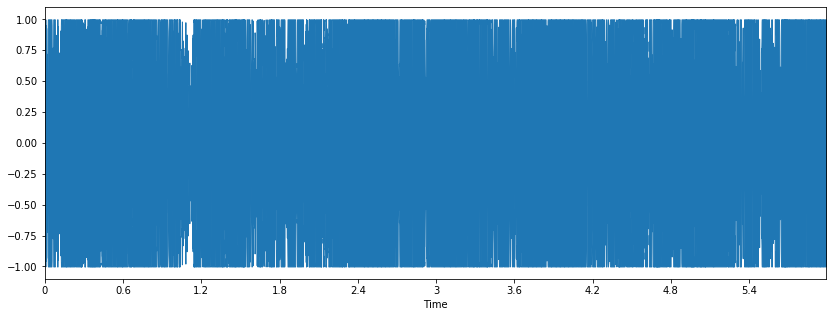

In [115]:
x, sr = librosa.load(SOUND_PATH, sr=RATE)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

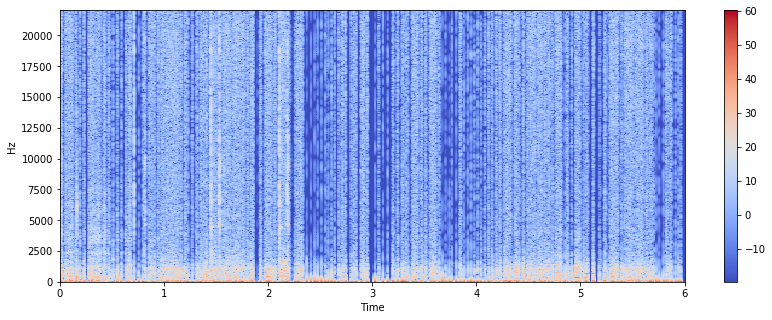

In [116]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [117]:
import seaborn as sns

/home/nadezhin/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


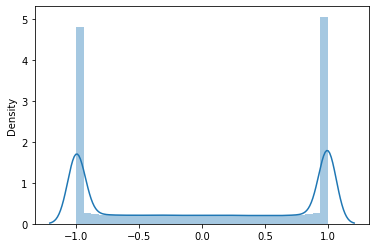

In [118]:
sns_plot = sns.distplot(x)
fig = sns_plot.get_figure()

In [121]:
bits = [1 if x[i] > 0 else 0 for i in range(len(x))]

In [ ]:
import sys
sys.path.append("/home/nadezhin/workspace/rand_gen_seq/project/test")
testlist = [
        'frequency_within_block_test',
        'monobit_test',
        'runs_test',
        'longest_run_ones_in_a_block_test',
        'binary_matrix_rank_test',
        'dft_test',
        'non_overlapping_template_matching_test',
        'overlapping_template_matching_test',
        'maurers_universal_test',
        'linear_complexity_test',
        'serial_test',
        'approximate_entropy_test',
        'cumulative_sums_test',
        'random_excursion_test',
        'random_excursion_variant_test']

print("Tests of Distinguishability from Random")

def run_tests(bits):
    results = list()

    for testname in testlist:
        print("TEST: %s" % testname)
        m = __import__("sp800_22_" + testname)
        func = getattr(m, testname)

        (success, p, plist) = func(bits)

        summary_name = testname
        if success:
            print("PASS")
            summary_result = "PASS"
        else:
            print("          FAIL")
            summary_result = "FAIL"

        if p != None:
            print("  P=" + str(p))
            summary_p = str(p)

        if plist != None:
            for pval in plist:
                print("P=" + str(pval))
            summary_p = str(min(plist))

        results.append((summary_name, summary_p, summary_result))

    print()
    print("SUMMARY")
    print("-------")

    for result in results:
        summary_name, summary_p, summary_result = result
        print(summary_name.ljust(40), summary_p.ljust(18), summary_result)


run_tests(bits)